<a href="https://colab.research.google.com/github/vivekmyers/palo/blob/master/PALO_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OpenAI Key here:

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = '...'

### Installation

In [ ]:
!git clone https://github.com/vivekmyers/palo

Cloning into 'palo'...
remote: Enumerating objects: 903, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 903 (delta 113), reused 191 (delta 55), pack-reused 629 (from 1)
Receiving objects: 100% (903/903), 60.95 MiB | 9.87 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [ ]:
%cd palo
!git pull
!pip install -e .

/content/palo
Already up to date.
Obtaining file:///content/palo
  Preparing metadata (setup.py) ... done
  Running setup.py develop for jaxrl_m


In [ ]:
!pip install openai wandb ml_collections tensorflow_text
!pip install jax==0.4.14 jaxlib==0.4.14 optax==0.1.7
!pip install distrax chex==0.1.8 opencv-python imageio flax==0.7.4 orbax-checkpoint==0.5.3
!pip install scipy==1.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
  Created wheel for ml_collections: filename=ml_collections-0.1.1-py3-none-any.whl size=9

You may want to restart your runtime here to adjust to the new jax version and connect to a TPU runtime

In [ ]:
!pip show flax jax
import jax.numpy as jnp
import palo.optimize as optimizer
import palo.query_vlm as query_vlm

Name: flax
Version: 0.7.4
Summary: Flax: A neural network library for JAX designed for flexibility
Home-page: https://github.com/google/flax
Author: 
Author-email: Flax team <flax-dev@google.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: jax, msgpack, numpy, optax, orbax-checkpoint, PyYAML, rich, tensorstore, typing-extensions
Required-by: dopamine_rl
---
Name: jax
Version: 0.4.14
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ml-dtypes, numpy, opt-einsum, scipy
Required-by: chex, distrax, dopamine_rl, flax, optax, orbax-checkpoint


### Propose Task Decomposition

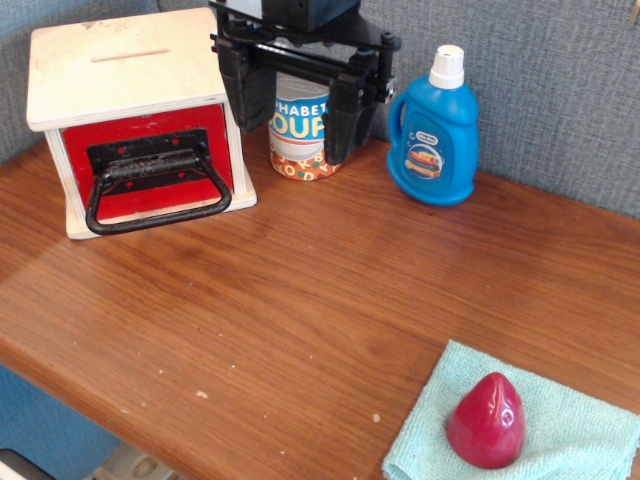

In [ ]:
from PIL import Image
im = Image.open("./data/traj1/images0/im_0.jpg")
im

Now let's look at what how a VLM can generate commands for the robot.

In [ ]:
!python palo/query_vlm.py

2024-09-09 21:42:19.464000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 21:42:19.494782: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 21:42:19.503264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-09 21:42:21.283203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/palo/palo/query_vlm.py", line 189, in <module>
    res = make_multiple_response(im_dim, instr, 10)
  File "/content/palo/palo/query_vlm.py", line 170, in make_multiple_response
    res.appe

### Decomposition Optimization

In [ ]:
instruction = "First open the drawer, and then put the sweet potato into the opened drawer"

In [ ]:
!python palo/optimize.py --instruction "First open the drawer, and then put the sweet potato into the opened drawer" --trajectory_path "./data" \
 --checkpoint_path "./agent/checkpoint/" --im_size 224 --config_dir "./agent/config.pkl"

2024-08-30 07:44:50.379558: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 07:44:50.403519: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 07:44:50.410665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-30 07:44:51.816075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Run config kwargs:  {'alignment': 0, 'decay_steps': 2000000, 'use_proprio': False, 'early_fusion': True, 'warmup_steps': 2000, 'learning_rate': 0.

In [ ]:
!pip show flax

### Find Best Decomposition